#### Assi-5. Write a program to implement K-means clustering algorithm. 

In [1]:
import pandas as pd

df = pd.read_csv('Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


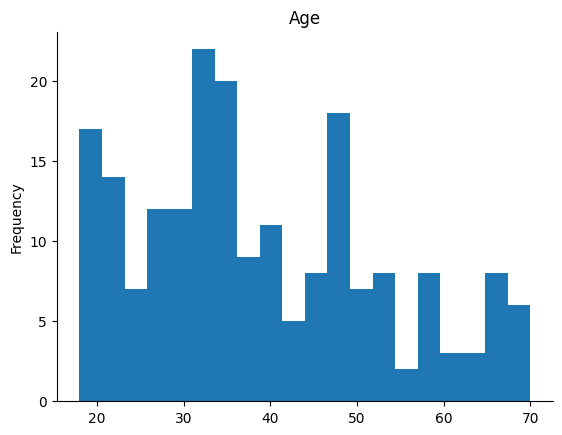

In [2]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

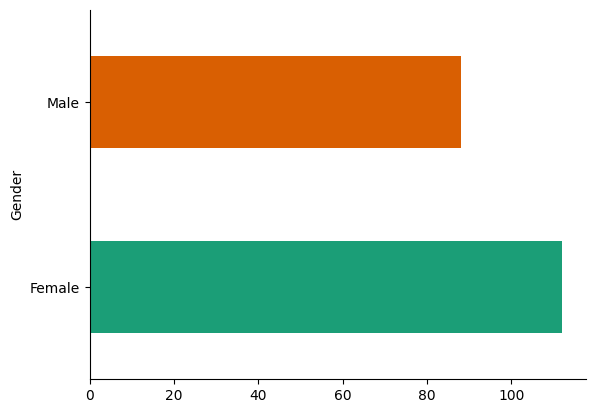

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

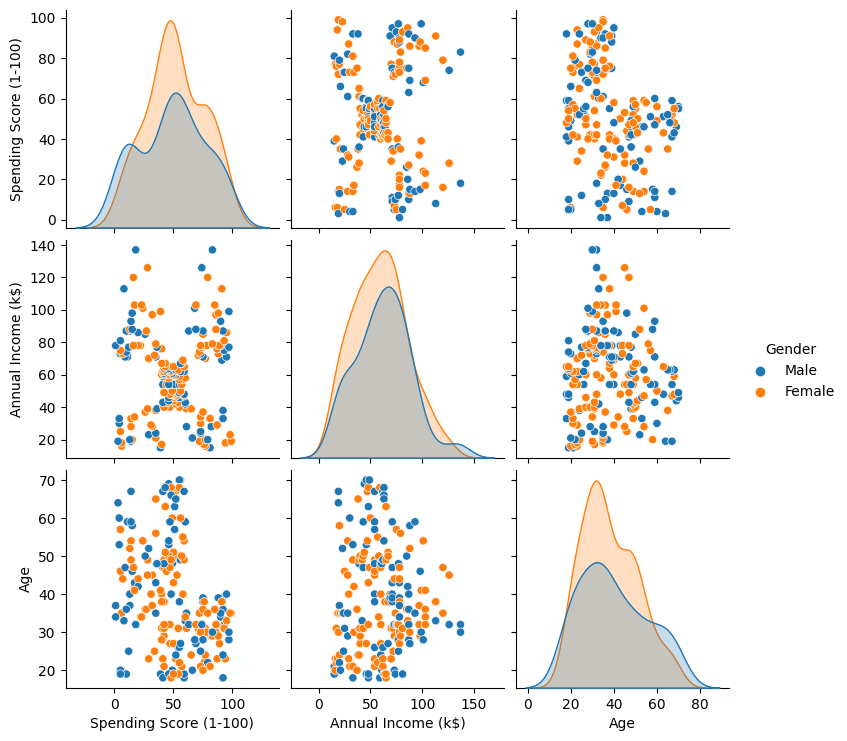

In [5]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

### K means clustering based on Age and spending score

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[['Age', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)


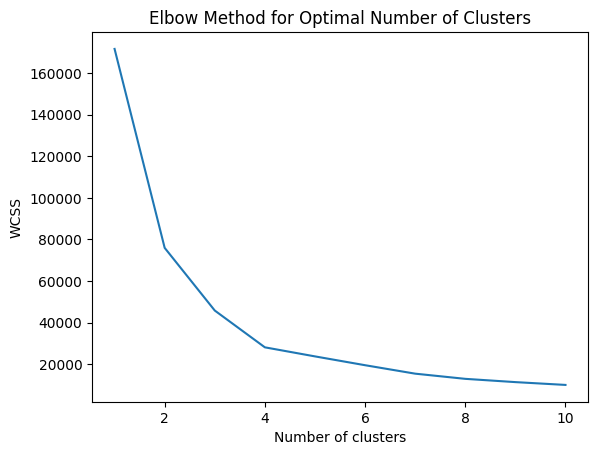

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=3)
identified_clusters = kmeans.fit(df[['Age', 'Spending Score (1-100)']])
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

print("Centroids:")
print(centroids)
print("Labels:")
print(labels)

Centroids:
[[43.05494505 47.78021978]
 [42.95744681 14.59574468]
 [29.56451613 80.74193548]]
Labels:
[0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2 1 2 1 2 0 0 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


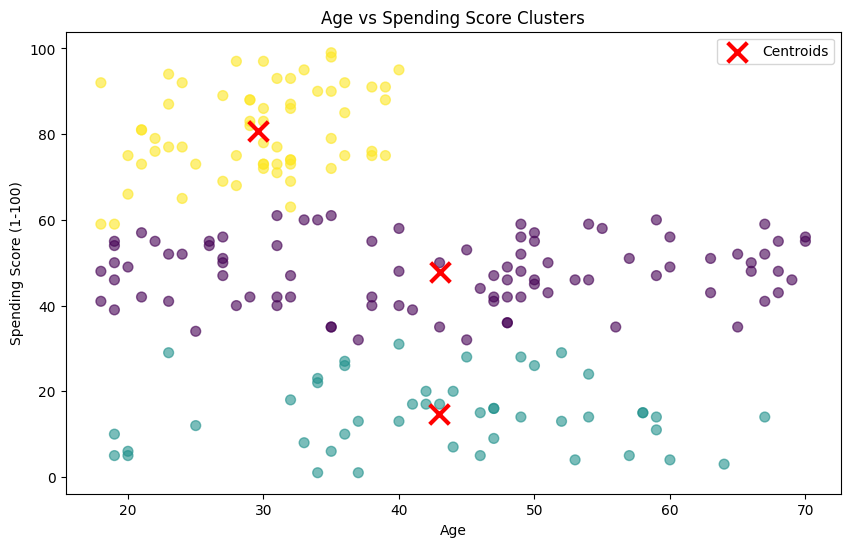

In [48]:
# Verify and plot Age vs Spending Score clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['Spending Score (1-100)'], 
           c=labels, s=50, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='red', marker='x', s=200, linewidths=3, 
           label='Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score Clusters')
plt.legend()
plt.show()

### K means clustering based on Age and spending score

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

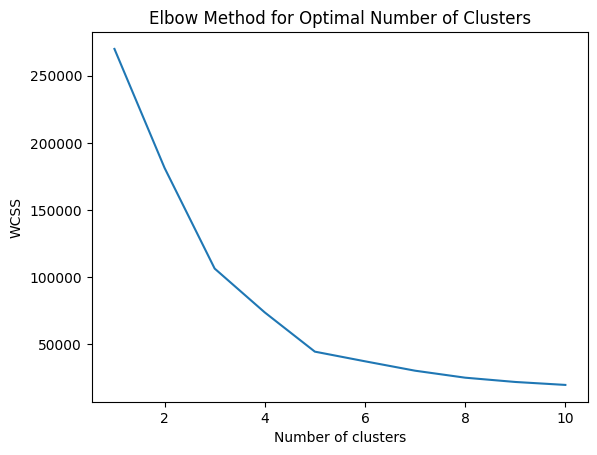

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5)
identified_clusters = kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

print("Centroids:")
print(centroids)
print("Labels:")
print(labels)

Centroids:
[[ 78.03571429  81.89285714]
 [ 25.72727273  79.36363636]
 [ 48.16831683  43.3960396 ]
 [ 87.          18.63157895]
 [108.18181818  82.72727273]]
Labels:
[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


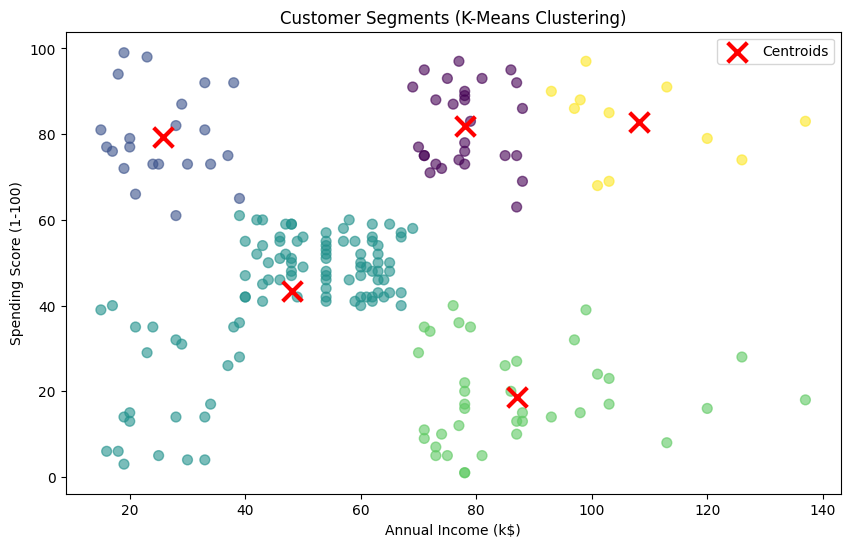

In [42]:
# Fix the visualization with correct features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
           c=labels, s=50, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='red', marker='x', s=200, linewidths=3, 
           label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K-Means Clustering)')
plt.legend()
plt.show()